# Latent Dirichlet Allocation 

Using the BBC News dataset, you are going to perform **topic modelling** using LDA approach, which means we will disregard the labels when building the topics model to the text data since LDA is unsupervised. For this exercise, we are estimating the number of topics these documents belong to.

Each word and document is assigned to a topic based on Bayesian probability methods, and the results can be plotted to show the topic distribution over each word and document.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

# To remove stopwords
from nltk.corpus import stopwords

# For vectorization and LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
#nltk.download('stopwords')

In [3]:
# Convert stop words into a set because you will add more stop words

stopwords = set(stopwords.words('english'))

In [4]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [5]:
# Add more stop words (due to domain knowledge)

stopwords = stopwords.union({'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year'})

# Convert set to list

stopwords = list(stopwords)

In [6]:
stopwords

['most',
 'shouldn',
 't',
 "she's",
 'because',
 'after',
 'again',
 'were',
 'where',
 'did',
 "didn't",
 'above',
 've',
 'shan',
 "you've",
 'he',
 'whom',
 'itself',
 'yourselves',
 'to',
 'all',
 'said',
 'of',
 'more',
 'some',
 'does',
 'what',
 's',
 "doesn't",
 "shan't",
 'theirs',
 'hers',
 'which',
 'if',
 "mustn't",
 'this',
 'who',
 'wasn',
 "shouldn't",
 'aren',
 "hadn't",
 'themselves',
 'there',
 'have',
 'hadn',
 "hasn't",
 'at',
 "it's",
 'been',
 'off',
 'don',
 'about',
 'having',
 'own',
 'mr',
 'his',
 'further',
 'should',
 'than',
 'yours',
 'with',
 'very',
 'haven',
 'why',
 'd',
 'am',
 "you're",
 'between',
 'i',
 'it',
 're',
 'her',
 'you',
 'in',
 'is',
 'll',
 'nor',
 'o',
 'doesn',
 'over',
 'will',
 'won',
 "wasn't",
 'do',
 'how',
 'and',
 'these',
 'be',
 'same',
 'would',
 'its',
 'isn',
 "don't",
 'hasn',
 'them',
 'our',
 'has',
 'y',
 'while',
 'mustn',
 'himself',
 'both',
 'few',
 'too',
 'didn',
 'out',
 "needn't",
 'those',
 'year',
 'under'

In [7]:
df = pd.read_csv('data/bbc_text_cls.csv')

In [8]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [9]:
# Initialize count vectorizer (with pre-defined stop words)

vectorizer = CountVectorizer(stop_words=stopwords)

In [10]:
# Train vectorizer on vectorized text and transform text to count matrix (documents-x-words)

X = vectorizer.fit_transform(df['text'])

**Note:** You could potentially split the data into training and test sets at this point, then you can evaluate the model using the log-likelihood or perplexity (exponential of negative log-likelihood) on out-of-sample data.

In [11]:
# Create LDA instance - default no of topics is 10

lda = LatentDirichletAllocation(n_components=10, random_state=42)

In [12]:
# Train LDA model on vectorized text

lda.fit(X)

LatentDirichletAllocation(random_state=42)

### Plot topics-by-words

In [13]:
# Function to plot bar charts for each topic with top words belonging with each

def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True) 
    axes = axes.flatten() 
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] 
        top_features = [feature_names[i] for i in top_features_ind] 
        weights = topic[top_features_ind]         
        ax = axes[topic_idx] 
        ax.barh(top_features, weights, height=0.7) 
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30}) 
        ax.invert_yaxis() 
        ax.tick_params(axis="both", which="major", labelsize=20) 
        
        for i in "top right left".split():
            ax.spines[i].set_visible(False) 
            
        fig.suptitle('LDA', fontsize=40) 
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3) 
    plt.show()

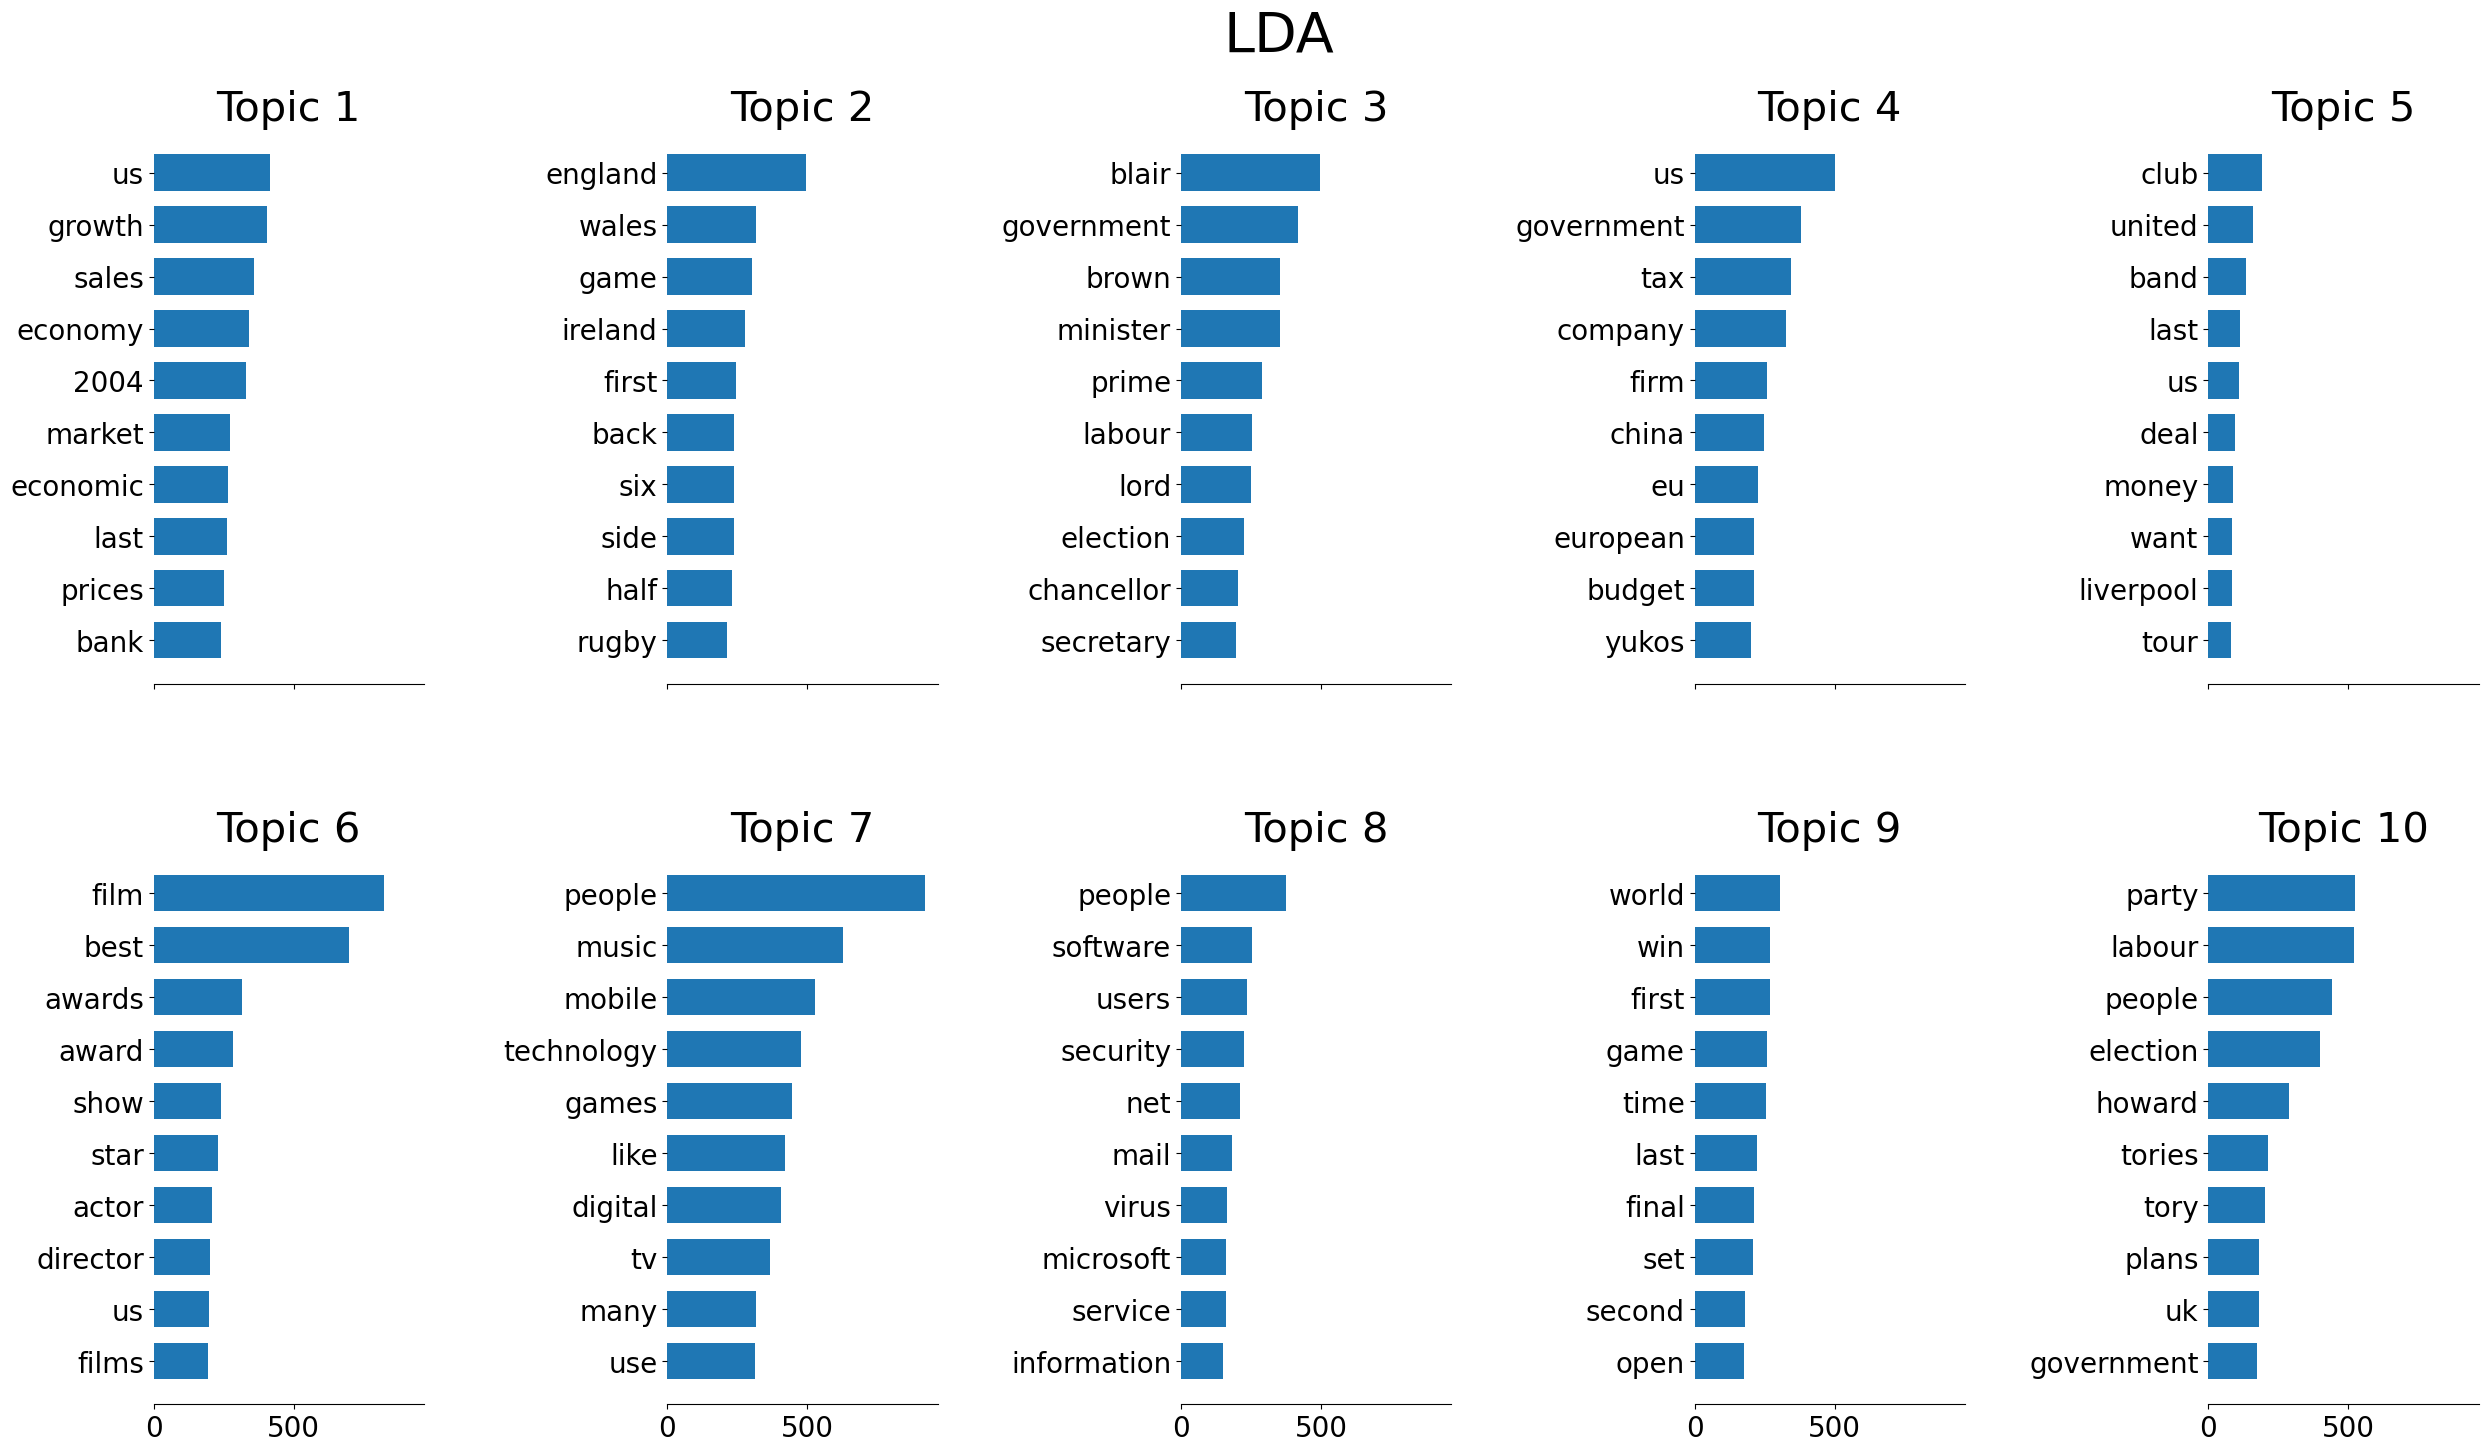

In [14]:
# Obtain index-to-word mapping from vectorizer
feature_names = vectorizer.get_feature_names_out()

# Plot top 10 words associated with each topic 
plot_top_words(lda, feature_names)

**The results make sense - note that a single word can be associated with multiple topics, e.g. 'US' (America)**

* Topics 1 & 4 are similar except for topic 4 seems more global
* Topics 3 & 10 are even more similar (related to UK politics - maybe separable by party??)
* Topic 6 is about films, and topic 7 is about games & music

### Plot documents-by-topics

In [16]:
Z = lda.transform(X)

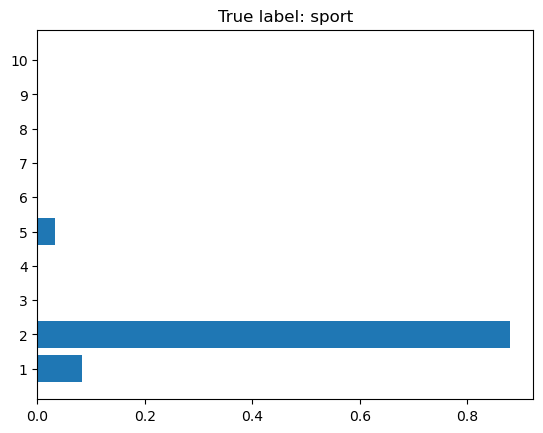

In [17]:
# 1) Pick a random document (i) and find its vector row in transformed matrix
# 2) Plot which "topics" are associated with it
# 3) Are they related to the true label?

np.random.seed(0)

i = np.random.choice(len(df))
z = Z[i]
# Define list of topics, i.e. 1 to 10
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

According to the model:

* Topic 2 is related to sports ('game', 'side', 'rugby')
* Topic 1 is more about budgets and economy, but country names are easily interchangeable
* Topic 5 has the least association but is more about sports than topic 1

In [18]:
# Function to wrap document

def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [19]:
# View original document - we know it's sports but specifically about Wales and the Six Nations

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

In [ ]:
# ---------------------------------------- SELECT ANOTHER RANDOM ARTICLE -------------------------------------- #

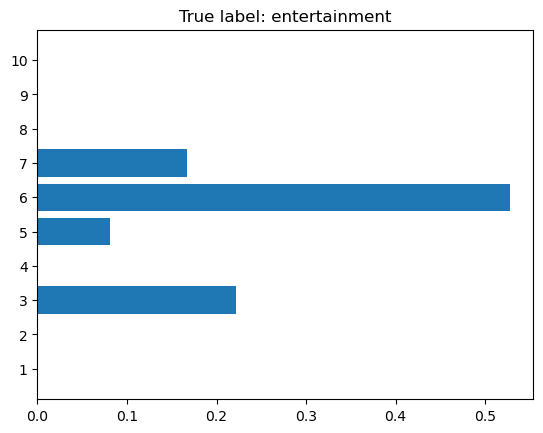

In [22]:
# Pick random document
i = np.random.choice(len(df))
# Grab its vector row in transformed matrix
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

In [23]:
# Topic 6 seems to be related to films industry
# Topic 3 seems to be related to UK politics
# Topic 7 seems to be related to games & music entertainment
# Topic 5 seems to be related to UK sports

In [24]:
print(wrap(df.iloc[i]['text']))

Jamelia's return to the top

R&B star Jamelia had three Brit
nominations to go with her triple triumph at last year's Mobo awards.
The Birmingham-born singer, full name Jamelia Davis, was signed to a
record label at the age of 15 and released her first single So High at
18. She released four number ones from her 2000 album Drama, including
the top five hit Money featuring the vocals of reggae artist Beenie
Man.  She racked up five Mobo nominations in 2000, winning one for
best video.  But in the same year she also fell pregnant and decided
to take a break from music to bring up her daughter Teja, who was born
in March 2001. While she originally planned to get back to work pretty
swiftly after giving birth it was actually two years before she
released another single.  During her absence R&B music exploded and a
whole host of female artists were on the scene, meaning Jamelia had to
once again prove herself.  Her comeback song Bout featuring Rah Digga
only just scrapped into the top 40.



In [ ]:
# Based on the original article, the LDA model should have assigned document to topic 6 or 7